2025-10-21 20:07:16.006080: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-21 20:07:17.158424: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-21 20:07:21.872163: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Training data: (61484, 28, 28) (61484,)
Testing data: (12405, 28, 28) (12405,)


/home/nazmulhasan77/miniconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1761055646.963826    4788 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1761055647.066162    4788 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,498 (119.13 KB)

 Trainable params: 30,498 (119.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9467 - loss: 0.1369 - val_accuracy: 0.9677 - val_loss: 0.0874
Epoch 2/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9761 - loss: 0.0658 - val_accuracy: 0.9753 - val_loss: 0.0653
Epoch 3/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9816 - loss: 0.0503 - val_accuracy: 0.9841 - val_loss: 0.0466
Epoch 4/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9854 - loss: 0.0396 - val_accuracy: 0.9840 - val_loss: 0.0446
Epoch 5/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9878 - loss: 0.0313 - val_accuracy: 0.9836 - val_loss: 0.0485
Epoch 6/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9899 - loss: 0.0270 - val_accuracy: 0.9881 - val_loss: 0.0347
Epoch 7/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9910 - loss: 0.0233 - val_accuracy: 0.9892 - val_loss: 0.0323
Epoch 8/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9923 - loss: 0.0201 - val_ac

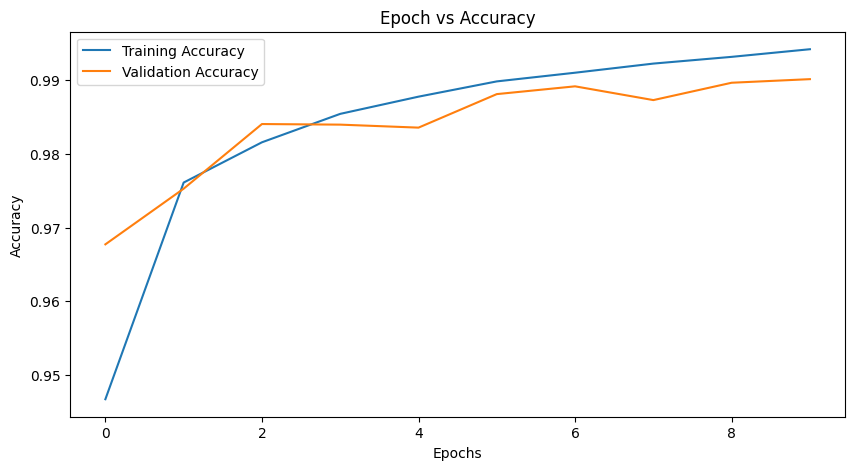

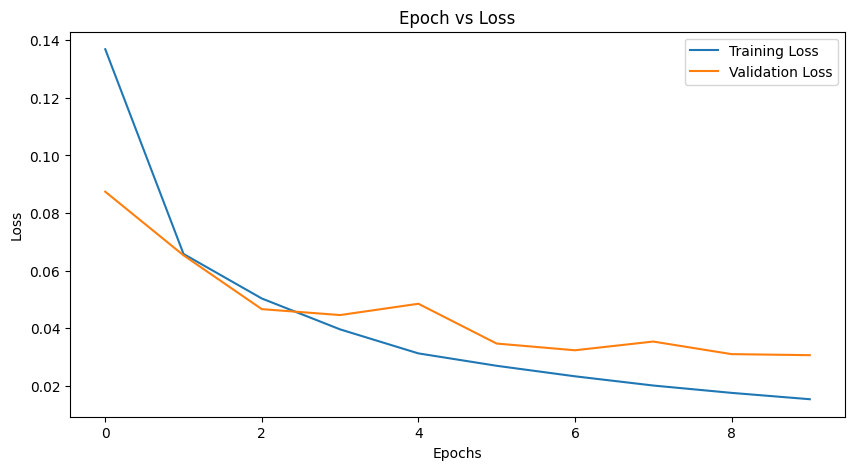

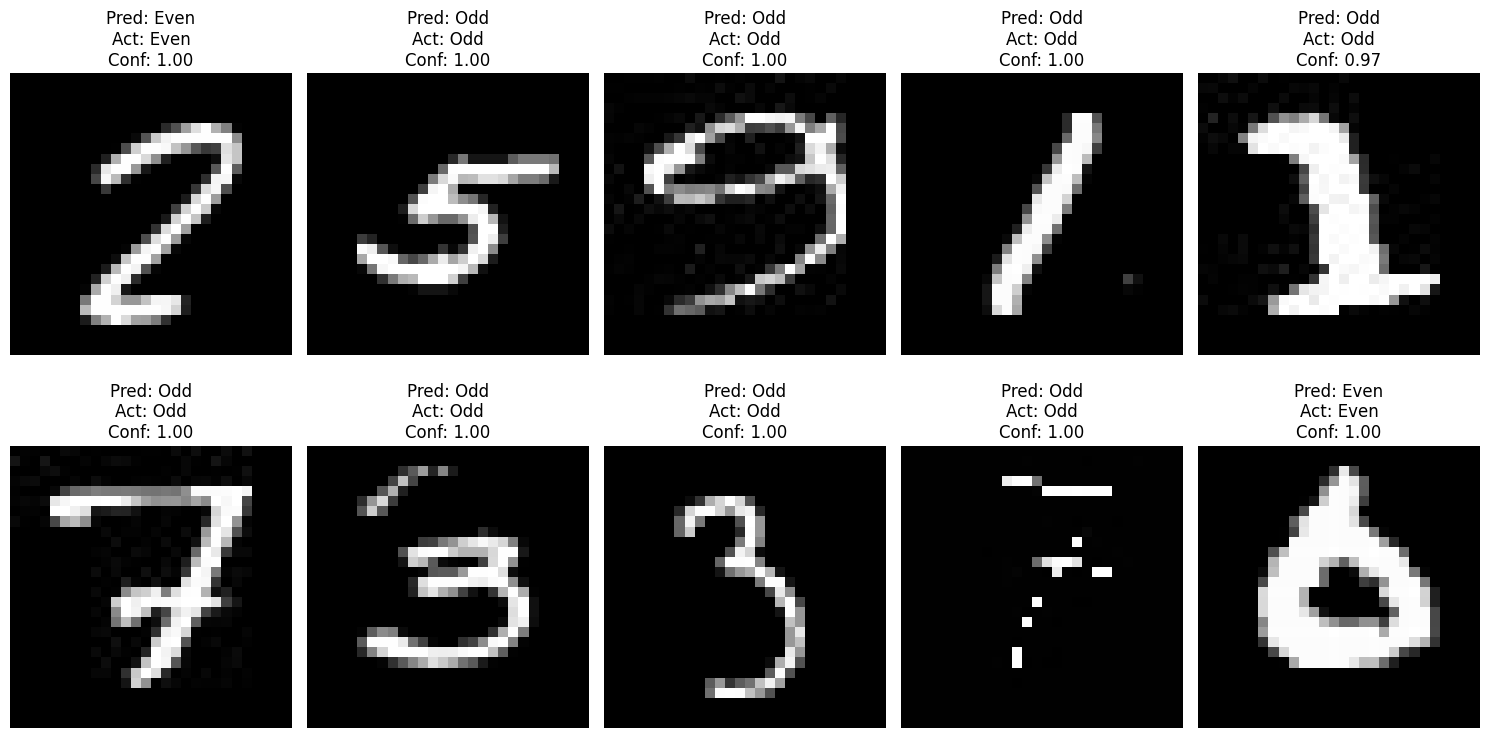


✅ Correct Predictions: 10/10 (100%)

💾 Model saved as 'odd_even_cnn_model.h5'


In [1]:
# ==========================================
# Odd vs Even CNN Classifier (from MNIST)
# ==========================================

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time, random

# ==============================
# 1️⃣ Load Dataset
# ==============================
data = np.load('odd_even_dataset.npz')

x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)

# ==============================
# 2️⃣ Preprocess Data
# ==============================

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension (MNIST is grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Encode string labels ("Odd"/"Even") → categorical
label_map = {"Even": 0, "Odd": 1}
y_train_num = np.array([label_map[label] for label in y_train])
y_test_num = np.array([label_map[label] for label in y_test])

y_train_cat = to_categorical(y_train_num, num_classes=2)
y_test_cat = to_categorical(y_test_num, num_classes=2)

# Optional: split training into train/val
x_train, x_val, y_train_cat, y_val_cat = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42
)

# ==============================
# 3️⃣ CNN Model Definition
# ==============================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ==============================
# 4️⃣ Training the Model
# ==============================
start_time = time.time()
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    validation_data=(x_val, y_val_cat),
    batch_size=64
)
train_time = time.time() - start_time
print(f"\n✅ Training completed in {train_time:.2f} seconds.\n")

# ==============================
# 5️⃣ Evaluate on Test Set
# ==============================
start_test = time.time()
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
test_time = time.time() - start_test

print(f"\n🧮 Testing time: {test_time:.2f} seconds")
print(f"🎯 Test Accuracy: {test_acc*100:.2f}%\n")

# ==============================
# 6️⃣ Plot Accuracy & Loss Curves
# ==============================
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Epoch vs Accuracy')
plt.savefig("odd_even_accuracy.png")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Epoch vs Loss')
plt.savefig("odd_even_loss.png")
plt.show()

# ==============================
# 7️⃣ Predict 10 Random Test Images
# ==============================
class_labels = ['Even', 'Odd']

indices = random.sample(range(len(x_test)), 10)
plt.figure(figsize=(15, 8))
correct = 0

for i, idx in enumerate(indices):
    img = x_test[idx]
    label_true = y_test[idx]

    pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_class = class_labels[np.argmax(pred)]
    confidence = np.max(pred)

    if pred_class == label_true:
        correct += 1

    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_class}\nAct: {label_true}\nConf: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Correct Predictions: {correct}/10 ({correct*10}%)")

# ==============================
# 8️⃣ Save Model
# ==============================
model.save("odd_even_cnn_model.h5")
print("\n💾 Model saved as 'odd_even_cnn_model.h5'")


# Testing using Different Data on Save model

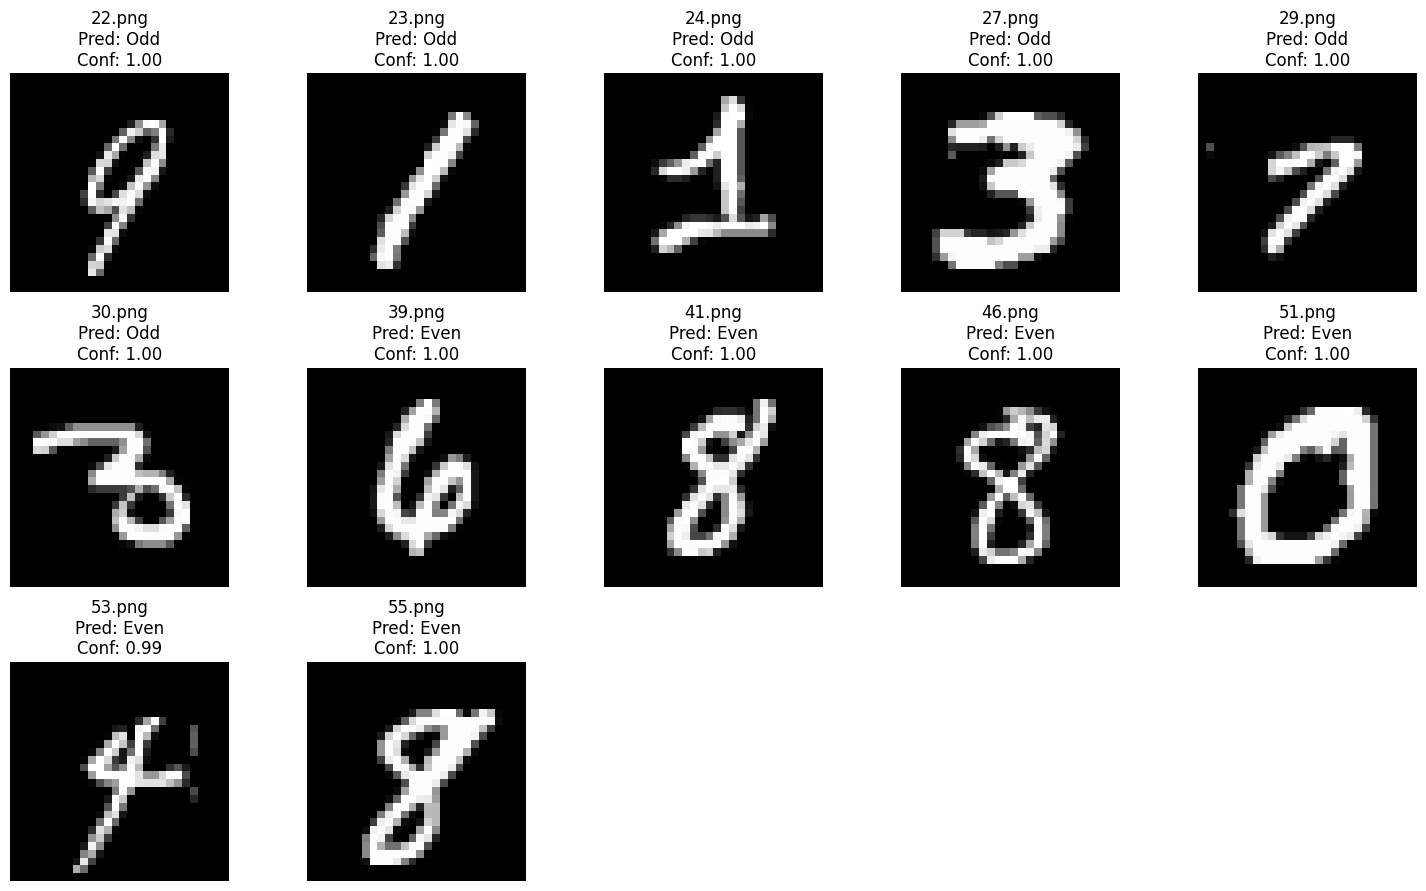

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# 1️⃣ Load the trained model
model = tf.keras.models.load_model("odd_even_cnn_model.h5")

# 2️⃣ Folder containing test images
test_folder = "test_images"   # your test image folder
class_names = ["Even", "Odd"]
img_size = (28, 28)

# 3️⃣ Collect all valid image file paths
image_paths = [
    os.path.join(test_folder, f)
    for f in os.listdir(test_folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
]

# 4️⃣ Predict all at once
images = []
titles = []

for path in image_paths:
    img = image.load_img(path, color_mode='grayscale', target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    images.append(img_array)
    
images = np.array(images)
predictions = model.predict(images, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
confidences = np.max(predictions, axis=1)

# 5️⃣ Plot all results in a grid
cols = 5  # number of images per row
rows = int(np.ceil(len(image_paths) / cols))

plt.figure(figsize=(15, 3 * rows))

for i, path in enumerate(image_paths):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"{os.path.basename(path)}\nPred: {class_names[predicted_classes[i]]}\nConf: {confidences[i]:.2f}")

plt.tight_layout()
plt.show()
